In [1]:
from agent import KalmanSR
from environment import SimpleMDP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dynamic_programming import value_iteration
import seaborn as sns
%matplotlib notebook

# Set up the problem 

In [2]:
env = SimpleMDP(5)

In [3]:
env.create_graph()

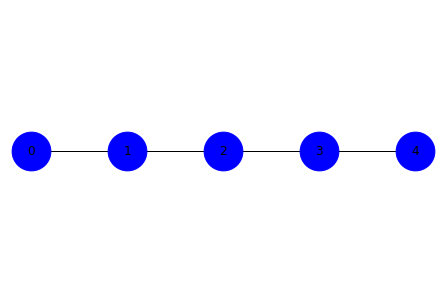

In [4]:
plt.figure()

positions = {0:(0,0), 1:(1,0), 2:(2,0), 3:(3,0), 4:(4,0)}

env.show_graph(layout=positions)

In [5]:
optimal_policy, optimal_values = value_iteration(env)

In [6]:
optimal_policy

[[0, 1.0], [0, 1.0], [0, 1.0], [0, 1.0], []]

In [7]:
optimal_values

array([0.729, 0.81 , 0.9  , 1.   , 0.   ])

In [8]:
env.get_transition_matrix(optimal_policy)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [9]:
M = env.get_successor_representation(optimal_policy, gamma=.9)
M

array([[1.    , 0.9   , 0.81  , 0.729 , 0.6561],
       [0.    , 1.    , 0.9   , 0.81  , 0.729 ],
       [0.    , 0.    , 1.    , 0.9   , 0.81  ],
       [0.    , 0.    , 0.    , 1.    , 0.9   ],
       [0.    , 0.    , 0.    , 0.    , 1.    ]])

Text(0.5, 1.0, 'True successor representation')

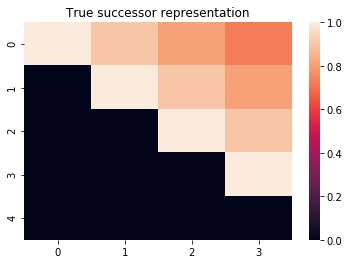

In [10]:
plt.figure()
sns.heatmap(M[:,:-1])
plt.title('True successor representation')

# Learning the successor representation using Kalman TD 

In [11]:
agent = KalmanSR(environment=env)

In [12]:
all_results = {}
for trial in range(100):
    results = agent.train_one_episode()
    all_results[trial] = results

In [13]:
results = pd.DataFrame.from_dict({(trial, step): all_results[trial][step] 
                           for trial in all_results.keys() 
                           for step in all_results[trial].keys()},
                       orient='index')

results.index.names = ['trial', 't']

In [14]:
results.head()

SR  \
trial t                                                      
0     0  [[1.0, 0.8992925930123037, 0.8086934783278618,...   
      1  [[1.0, 0.8992925930123037, 0.8086934783278618,...   
      2  [[1.0, 0.8992925930123037, 0.8086934783278618,...   
      3  [[1.0, 0.8992925930123037, 0.8086934783278618,...   
1     0  [[1.0, 0.8992925930123037, 0.8086934783278618,...   

                                                       cov  \
trial t                                                      
0     0  [[0.6467144073358045, 0.3224570333977758, 0.0,...   
      1  [[0.6107439189061169, 0.23100269896153247, 0.1...   
      2  [[0.6104328647791226, 0.2191473626217498, 0.08...   
      3  [[0.6143873133971218, 0.216813482567479, 0.077...   
1     0  [[0.5091849021501216, 0.27714431685683805, 0.0...   

                                                         K  \
trial t                                                      
0     0  [0.35650307727780634, -0.32085276955002573, 0....   
      1  [0.12705720200293297, 0.2836171178298577, -0.3...   
      2  [0.04598514465901901, 0.10264805131533578, 0.2...   
      3  [0.024889677631110316, 0.0555587445825136, 0.1...   
1     0  [0.2597550169789673, -0.1422041197452865, -0.0...   

                                                        dt    r  state  \
trial t                                                                  
0     0                          [0.0, 0.9, 0.0, 0.0, 0.0]  0.0      0   
      1           [0.0, 0.2887674925950232, 0.9, 0.0, 0.0]  0.0      1   
      2  [0.0, 0.10342835518268605, 0.3223545657023229,...  0.0      2   
      3  [0.0, 0.037618593712848244, 0.1172456568338362...  1.0      3   
1     0  [0.0, 0.36201956336094676, 0.13327943625503305...  0.0      0   

                                                         V  \
trial t                                                      
0     0                          [0.0, 0.0, 0.0, 0.0, 0.0]   
      1                          [0.0, 0.0, 0.0, 0.0, 0.0]   
      2                          [0.0, 0.0, 0.0, 0.0, 0.0]   
      3  [0.08488094956550846, 0.13363612042932876, 0.2...   
1     0  [0.09591527331913088, 0.12810245274142568, 0.2...   

                                                     V_var  \
trial t                                                      
0     0  [0.4182395246557009, 0.5109228426774557, 1.010...   
      1  [0.3730081344808015, 0.2658890254834591, 0.468...   
      2  [0.37367386426308336, 0.2484323274751288, 0.28...   
      3  [0.48099881905105407, 0.3320709734064417, 0.33...   
1     0  [0.34596881358649517, 0.2996059245410455, 0.33...   

                                                         w  
trial t                                                     
0     0                          [0.0, 0.0, 0.0, 0.0, 0.0]  
      1                          [0.0, 0.0, 0.0, 0.0, 0.0]  
      2                          [0.0, 0.0, 0.0, 0.0, 0.0]  
      3  [0.024889677631110316, 0.0555587445825136, 0.1...  
1     0  [0.018424458995440235, 0.05909815928078959, 0....

In [15]:
np.around(results.iloc[-1]['SR'],decimals=3)

array([[ 1.   ,  0.899,  0.809,  0.727,  0.   ],
       [ 0.   ,  0.999,  0.899,  0.808,  0.   ],
       [ 0.   , -0.   ,  0.999,  0.899,  0.   ],
       [ 0.   , -0.   , -0.   ,  0.999,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ]])

Text(0.5, 1.0, 'Kalman estimate of successor representation')

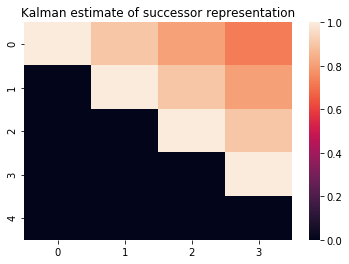

In [16]:
plt.figure()
sns.heatmap(results.iloc[-1]['SR'][:,:-1])
plt.title('Kalman estimate of successor representation')

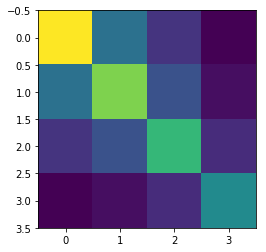

In [28]:
plt.imshow(results.iloc[-1]['cov'][:-1, :-1])

## Estimating value using the SR

In [18]:
V = np.concatenate(results['V'].values).reshape(-1, 5)

Text(0.5, 1.0, 'Value')

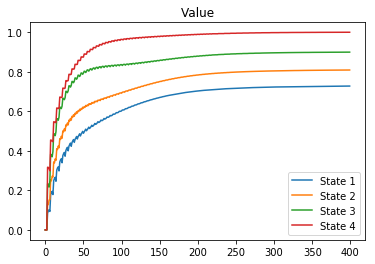

In [19]:
for i in range(4):
    plt.plot(V[:,i])
    
plt.legend(['State 1', 'State 2', 'State 3', 'State 4'])
plt.title('Value')

In [20]:
variances = np.array([np.diag(results['cov'].values[i]) for i in range(len(results))])

Text(0.5, 1.0, 'Uncertainty')

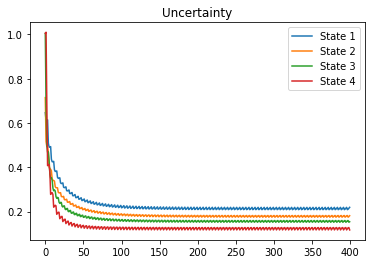

In [21]:
for i in range(4):
    plt.plot(variances[:,i])
    
plt.legend(['State 1', 'State 2', 'State 3', 'State 4'])
plt.title('Uncertainty')

In [22]:
V_variances = np.concatenate(results.V_var.values).reshape(-1,5)

Text(0.5, 1.0, 'Uncertainty in value estimate')

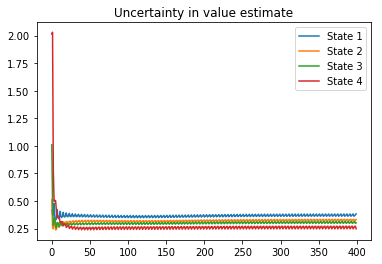

In [23]:
for i in range(4):
    plt.plot(V_variances[:,i])
    
plt.legend(['State 1', 'State 2', 'State 3', 'State 4'])
plt.title('Uncertainty in value estimate')

## Compare uncertainty in SR with uncertainty in V

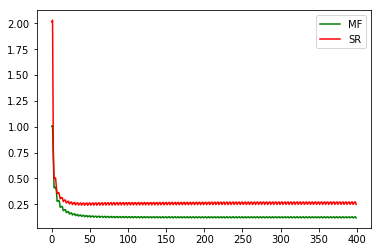

In [24]:
plt.plot(variances[:,3], color='green')
plt.plot(V_variances[:,3], color='red')
plt.legend(['MF', 'SR'])


In [25]:
results['cov'].iloc[-1]

array([[0.21931963, 0.09684065, 0.05324335, 0.02404325, 0.        ],
       [0.09684065, 0.1813944 , 0.07326194, 0.03117608, 0.        ],
       [0.05324335, 0.07326194, 0.15426709, 0.04854278, 0.        ],
       [0.02404325, 0.03117608, 0.04854278, 0.11725476, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 3.        ]])

In [26]:
results['SR'].iloc[-1][0, -2]

0.7273002758528431

In [27]:
results['w'].iloc[-1][-2]

1.0000019326827743